# <font color='blue'>Predict Price Of Used Car Sell</font>
Author: Mayuri Vijay Wabale

## Abstract 

Approximately 40 million used vehicles are sold each year. Effective pricing strategies can help any company to efficiently sell its products in a competitive market and making profit. In the automotive sector, pricing analytics play an essential role for both companies and individuals to assess the market price of a vehicle before putting it on sale or buying it. And, the rise of used cars sales is exponentially increasing. Car sellers sometimes take advantage of this scenario by listing unrealistic prices owing to the demand.

Therefore, arises a need for a model that can assign a price for a vehicle by evaluating its features taking the prices of other cars into consideration. In this Notebook, we use supervised learning methods to predict the prices of used cars. The model has been chosen after careful exploratory data analysis to determine the impact of each feature on price.

## **Introduction**
There is a huge demand for used cars in the Indian Market today.As sales of new cars have slowed down due to increase price of new cars in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now.
      
I have made this model which will predict estimated price of old car base on their features. As now a day we know many people are going to buy second hand car instead of buying new one, so its better investment option where we get almost 30-40% discount. but main question is how will us know actual price of car base on their features so in order to solve this problem I have used this dataset to build model which will give a estimated price of car at which car should be sold

## **Content**


This Dataset contains information of 5000+ old cars with different models and features like their Year, Name of the Company, KM driven, Power, Fuel Type and Location.

This Dataset contains total 12 features


*   Name
*   Location
*   Year
*   Kilometer_Driven
*   Fuel_type
*   Transmission
*   Owner_type
*   Mileage
*   Engine
*   Power
*   seats
*   Price



## To do

1. Data Cleaning and Data Correction

2. Replacing Null Values

3. Exploratory Data Analysis(EDA)

4. Feature Engineering & Visualization

5. Handling Outliers

6. Model Training and Model Evaluation (Multiple Linear Regression)

7. Residual Error

8. Improving Accuracy using Transformation

9. Conclusion

# <font color='red'>Data Cleaning and Data Correction</font>

## Libraries

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import io
import statsmodels.api as sm
warnings.filterwarnings('ignore')

## Load Dataset

In [136]:
df1 = pd.read_csv('used_cars_data.csv')

In [137]:
df1

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


## Shape Of Data

In [138]:
df1.shape

(6019, 14)

## Drop Unwanted Columns

In [139]:
df1.drop(["S.No.","New_Price"],axis=1,inplace=True)

In [140]:
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


## Checking for Null Values

In [141]:
df1.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

<b> conclusion: <b>

*   Missing values present in 4 features namely Mileage, Engine, Power and Seats.

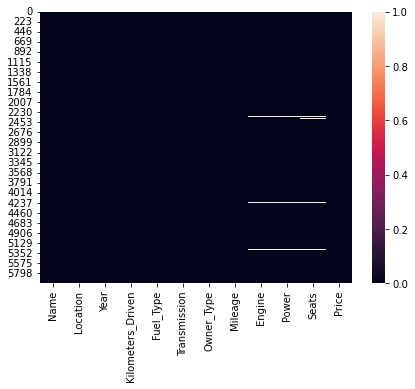

In [142]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.isnull())
plt.show()

<b> conclusion: <b>

*   Blank Space is there for 4 features



# <font color='red'> Data Cleaning and Data Correction</font>

### 1. Location

In [143]:
df1['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

<b> conclusion: <b>

*   Total 11 locations are there



### 2. Fuel Type

In [144]:
df1['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

<font size='4'>LPG and Electric Cars</font>

In [145]:
df1[(df1['Fuel_Type']=='Electric') | (df1['Fuel_Type']=='LPG')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.85
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,1.45
2278,Hyundai Santro Xing GLS LPG,Pune,2010,55000,LPG,Manual,Second,13.45 km/kg,1086 CC,62.1 bhp,5.0,1.65
2385,Hyundai Santro Xing GLS LPG,Hyderabad,2011,17000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.0,3.10
2436,Hyundai i10 Magna LPG,Jaipur,2012,53000,LPG,Manual,Second,19.2 km/kg,1086 CC,68.05 bhp,5.0,2.85
2941,Hyundai Santro Xing GL Plus LPG,Hyderabad,2014,56000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.0,3.20
3595,Maruti Wagon R LX DUO BSIII,Hyderabad,2007,65047,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,1.95
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


<b> conclusion: <b>
<ul>
<li>There are very very less car with LPG and Electric as fuel system so we can drop it</li>
</ul>   

In [146]:
j =df1[(df1['Fuel_Type']=='LPG') | (df1['Fuel_Type']=='Electric')].index
df1.drop(j,axis=0,inplace=True)

### 3. Transmission

In [147]:
df1['Transmission'].value_counts()

Manual       4289
Automatic    1718
Name: Transmission, dtype: int64

<b> conclusion : </b>
<ul>
    <li> There are 2 types of Transmission system in automobile which are manual and automatic </li>
    <ul>

### 4. Owner Type

In [148]:
df1['Owner_Type'].value_counts()

First             4919
Second             966
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

<b> conclusion: <b>
*    Fourth & Above category is very very less so we drop it

In [149]:
i = df1[df1['Owner_Type']=='Fourth & Above'].index
df1.drop(i,axis=0,inplace=True)

### 5. Seats

In [150]:
df1['Seats'].value_counts()

5.0     4998
7.0      672
8.0      132
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [151]:
df1[df1['Seats']>8]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.1 kmpl,2446 CC,75 bhp,10.0,3.50
917,Tata Sumo DX,Mumbai,2013,20000,Diesel,Manual,First,14.07 kmpl,1978 CC,83.1 bhp,10.0,5.25
1347,Mahindra Scorpio LX BS IV,Bangalore,2007,74112,Diesel,Manual,First,12.05 kmpl,2179 CC,120 bhp,9.0,4.10
1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.1 kmpl,2446 CC,75 bhp,10.0,3.65
2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0 kmpl,2446 CC,null bhp,10.0,3.50
2312,Chevrolet Tavera LT 9 Str BS IV,Kolkata,2012,67132,Diesel,Manual,First,13.58 kmpl,2499 CC,78 bhp,9.0,4.75
2359,Mahindra Xylo D2 Maxx,Chennai,2016,150000,Diesel,Manual,First,14.95 kmpl,2489 CC,93.7 bhp,9.0,4.50
2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000,Diesel,Manual,First,14.8 kmpl,2499 CC,80 bhp,10.0,5.50


In [152]:
df1['Seats']=np.where(df1['Seats']>8,5,df1['Seats'])
df1.drop(df1[df1['Seats']==0].index,axis=0,inplace=True)

In [153]:
df1['Seats'].value_counts()

5.0    5006
7.0     672
8.0     132
4.0      99
6.0      31
2.0      16
Name: Seats, dtype: int64

<b>conclusion: <b>
*  0 seats sedan cars are not availables in realife and 10 seats cars are not so much on demand
*  so we can replace 10 seaters with mode of seats lets say 5

### 6. Name

In [154]:
df1['Name'].value_counts()

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Swift VDI BSIV                  31
                                       ..
Mahindra Scorpio S10 AT 4WD             1
Hyundai i20 1.2 Era                     1
Toyota Camry W4 (AT)                    1
BMW 5 Series 2013-2017 520d M Sport     1
Mahindra Xylo D4 BSIV                   1
Name: Name, Length: 1862, dtype: int64

In [155]:
df1['Name'].nunique()

1862

<font size= "4">Features spliting (Car & Model)</font>

In [156]:
df1['Model']=df1['Name'].map(lambda x: str(x).strip().split(" ")[1])

In [157]:
df1['Name']=df1['Name'].map(lambda x: str(x).strip().split(" ")[0])
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Wagon
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Creta
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Jazz
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,Swift
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,Xcent
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,Xylo
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,Wagon


In [158]:
df1['Model'].value_counts()

Swift         351
City          270
i20           246
Verna         170
Innova        162
             ... 
XUV300          1
Fortwo          1
Countryman      1
Clubman         1
F               1
Name: Model, Length: 210, dtype: int64

In [159]:
df1['Model'].value_counts()[df1['Model'].value_counts()<5]

Avventura     4
V40           4
Hexa          4
R-Class       4
Tucson        4
             ..
XUV300        1
Fortwo        1
Countryman    1
Clubman       1
F             1
Name: Model, Length: 75, dtype: int64

<b> conclusion: <b>
*   As seen here there are total 1862 types of cars which is very high
*   we have to make seperate features for car model and car manufactures by feature spliting

### 7. Year

In [160]:
df1['Year'].value_counts()

2014    796
2015    744
2016    740
2013    649
2017    587
2012    575
2011    464
2010    339
2018    298
2009    197
2008    171
2007    122
2019    102
2006     77
2005     56
2004     31
2003     17
2002     15
2001      7
2000      4
1998      4
1999      2
Name: Year, dtype: int64

<font size='3'>Covert data types into object</font>
*  Year should be in object as its is category not a Numerical Number

In [161]:
df1['Year']=df1['Year'].astype(str)

In [162]:
df1['Year']=np.where(df1['Year'].astype(int)<2003,"less than 2003",df1['Year'])

In [163]:
df1['Year'].value_counts()

2014              796
2015              744
2016              740
2013              649
2017              587
2012              575
2011              464
2010              339
2018              298
2009              197
2008              171
2007              122
2019              102
2006               77
2005               56
less than 2003     32
2004               31
2003               17
Name: Year, dtype: int64

<b> conclusion:<b>
*  As seen here there are total 22 differents years of car model
*  Cars with Years 2000,2001,2002,1998 & 1999 are very very less so we can make sepearte category of "less than 2003" for all

### 8. Kilometers Driven

In [164]:
df1['Kilometers_Driven'].isnull().sum()

0

<font size='4'>Check Data Types</font>

In [165]:
df1.dtypes

Name                  object
Location              object
Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Model                 object
dtype: object

### 9. Mileage

In [166]:
df1.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               35
Power                35
Seats                41
Price                 0
Model                 0
dtype: int64

In [167]:
df1['Mileage'].unique

<bound method Series.unique of 0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 5997, dtype: object>

In [168]:
df1['Mileage']=df1['Mileage'].map(lambda x: str(x).strip().split(" ")[0])
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,1.75,Wagon
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50,Creta
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199 CC,88.7 bhp,5.0,4.50,Jazz
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00,Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968 CC,140.8 bhp,5.0,17.74,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4,1248 CC,74 bhp,5.0,4.75,Swift
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120 CC,71 bhp,5.0,4.00,Xcent
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498 CC,112 bhp,8.0,2.90,Xylo
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9,998 CC,67.1 bhp,5.0,2.65,Wagon


<font size='4'>Convert data type into float</font>

In [169]:
df1['Mileage']=df1['Mileage'].astype(float)

<b>conclusion:<b>
*  Data correction of Mileage feature (Numerical feature)
*  Then we convert data to float

### 10. Engine

In [170]:
df1['Engine'].unique

<bound method Series.unique of 0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
6014    1248 CC
6015    1120 CC
6016    2498 CC
6017     998 CC
6018     936 CC
Name: Engine, Length: 5997, dtype: object>

<font size='4'>Data correction of Engine by paasing it through function fun()</font>

In [171]:
def fun(x):
    if x == None:
        return x
    elif len(str(x).split(" "))==2:
        return str(x).split(" ")[0]

In [172]:
df1['Engine']=df1['Engine'].apply(fun)

In [173]:
df1['Engine'].isnull().sum()

35

<font size='4'>Convert data type into float</font>

In [174]:
df1['Engine']=df1['Engine'].astype(float)

<font size='4'>Replace Null values of Engine column by mean base on model</font>

In [175]:
lst = df1['Model'].unique()
for i in lst:
    mean_model = df1[df1["Model"]==i]['Engine'].mean()
    df1.update(df1[df1['Model']==i]['Engine'].fillna(mean_model))

In [176]:
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,1.75,Wagon
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50,Creta
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50,Jazz
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00,Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74 bhp,5.0,4.75,Swift
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71 bhp,5.0,4.00,Xcent
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112 bhp,8.0,2.90,Xylo
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.1 bhp,5.0,2.65,Wagon


### 11. Power

In [177]:
df1['Power'].isnull().sum()

35

In [178]:
df1['Power'].unique

<bound method Series.unique of 0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 5997, dtype: object>

<font size='4'>Data correction of power by passing it through function func</font>

In [179]:
df1['Power']=df1['Power'].apply(fun)

In [180]:
df1['Power'].unique

<bound method Series.unique of 0       58.16
1       126.2
2        88.7
3       88.76
4       140.8
        ...  
6014       74
6015       71
6016      112
6017     67.1
6018     57.6
Name: Power, Length: 5997, dtype: object>

In [181]:
df1['Power'].isnull().sum()

35

In [182]:
df1[df1['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
194,Honda,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,1494.718045,None,NaN,2.95,City
208,Maruti,Kolkata,2010,42001,Petrol,Manual,First,16.10,1240.447368,None,NaN,2.11,Swift
733,Maruti,Chennai,2006,97800,Petrol,Manual,Third,16.10,1240.447368,None,NaN,1.75,Swift
749,Land,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,2475.719298,None,NaN,26.50,Rover
1294,Honda,Delhi,2009,55005,Petrol,Manual,First,12.80,1494.718045,None,NaN,3.20,City
1327,Maruti,Hyderabad,2015,50295,Petrol,Manual,First,16.10,1240.447368,None,NaN,5.80,Swift
1385,Honda,Pune,2004,115000,Petrol,Manual,Second,0.00,1494.718045,None,NaN,1.50,City
1460,Land,Coimbatore,2008,69078,Petrol,Manual,First,0.00,2475.719298,None,NaN,40.88,Rover
2074,Maruti,Pune,2011,24255,Petrol,Manual,First,16.10,1240.447368,None,NaN,3.15,Swift
2096,Hyundai,Coimbatore,2004,52146,Petrol,Manual,First,0.00,1077.044118,None,NaN,1.93,Santro


<font size='4'>Replace Null values of Power column by mean base on model</font>

In [183]:
lst = df1['Model'].unique()
for i in lst:
    mean_model = df1[df1["Model"]==i]['Seats'].mode(0)[0]
    df1.update(df1[df1['Model']==i]['Seats'].fillna(mean_model))

In [184]:
df1[df1['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
194,Honda,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,1494.718045,None,5.0,2.95,City
208,Maruti,Kolkata,2010,42001,Petrol,Manual,First,16.10,1240.447368,None,5.0,2.11,Swift
733,Maruti,Chennai,2006,97800,Petrol,Manual,Third,16.10,1240.447368,None,5.0,1.75,Swift
749,Land,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,2475.719298,None,5.0,26.50,Rover
1294,Honda,Delhi,2009,55005,Petrol,Manual,First,12.80,1494.718045,None,5.0,3.20,City
1327,Maruti,Hyderabad,2015,50295,Petrol,Manual,First,16.10,1240.447368,None,5.0,5.80,Swift
1385,Honda,Pune,2004,115000,Petrol,Manual,Second,0.00,1494.718045,None,5.0,1.50,City
1460,Land,Coimbatore,2008,69078,Petrol,Manual,First,0.00,2475.719298,None,5.0,40.88,Rover
2074,Maruti,Pune,2011,24255,Petrol,Manual,First,16.10,1240.447368,None,5.0,3.15,Swift
2096,Hyundai,Coimbatore,2004,52146,Petrol,Manual,First,0.00,1077.044118,None,5.0,1.93,Santro


<font size='4'>Convert data type of power into float</font>

In [185]:
df1['Power'] = pd.to_numeric(df1['Power'],errors='coerce')

In [186]:
a = df1['Model'].unique()
for i in a:
    r = df1[df1["Model"]==i]['Power'].astype(float).mean()
    df1.update(df1[df1['Model']==i]['Power'].fillna(r))

In [187]:
df1.dropna(axis=0,inplace=True)

<font size='4'>Check Null Values again</font>

In [188]:
df1.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Model                0
dtype: int64

In [189]:
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Wagon
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Creta
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Jazz
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Swift
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Xcent
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Xylo
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Wagon


<font size='4'> Check Data Types</font>

In [190]:
df1.dtypes

Name                  object
Location              object
Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Model                 object
dtype: object

<b>Conclusion:<b>
*  We have done EDA, data cleaning and data conversion of all features
*  Now we will visualise all features
*  we will sort out all important features which dominate more to predict output or target feature ie price

# <font color='red'>Exploratory Data Analysis(EDA)</font>

<font size='4'> Total Cars of all Companies</font>

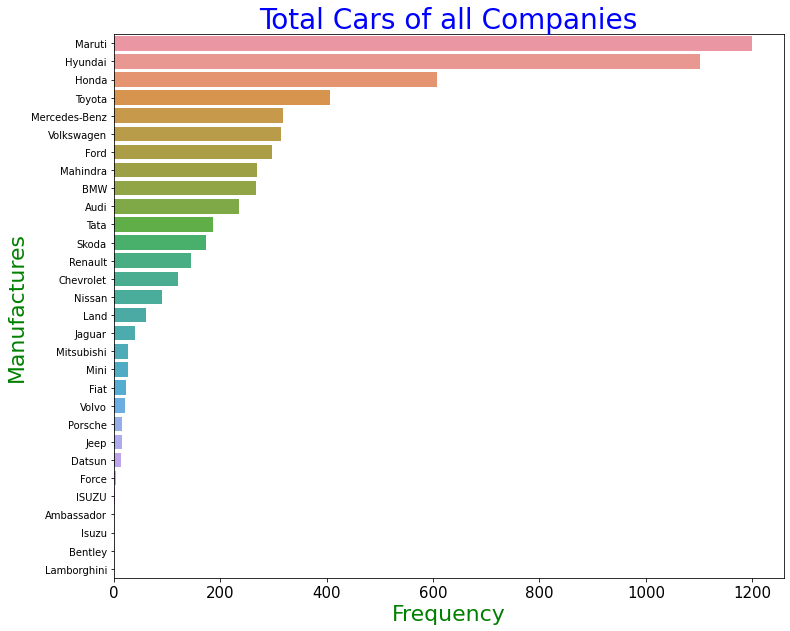

In [191]:
plt.figure(figsize=(12,10))
most_cat = df1['Name'].value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=df1)
plt.xticks(size=15)
plt.xlabel("Frequency",size=22,c="g")
plt.ylabel("Manufactures",size=22,c="g")
plt.title("Total Cars of all Companies",size=28,c="blue")
plt.show()

<b>conclusion:<b>
*  As seen Bently, Force, Lamborghini, and Isuzu cars are very very less
*  so these will act as outlier we will drop it

In [192]:
df1['Name'].value_counts()[df1['Name'].value_counts()<5]

Force          3
ISUZU          2
Ambassador     1
Isuzu          1
Bentley        1
Lamborghini    1
Name: Name, dtype: int64

In [193]:
i = df1['Name'].value_counts()[df1['Name'].value_counts()<5].index
index = df1[df1['Name'].isin(i)].index
df1.drop(index,axis=0,inplace=True)

<font size='4'>Total Cars Location wise</font>

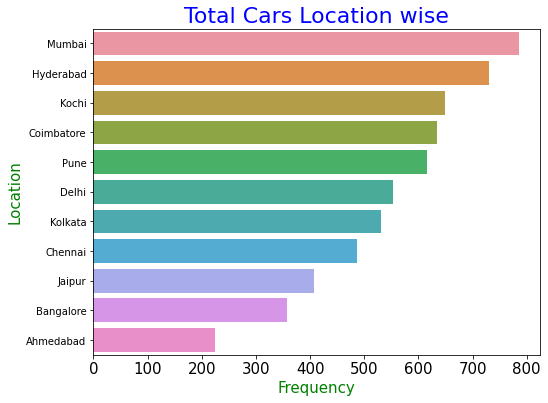

In [194]:
plt.figure(figsize=(8,6))
most_cat = df1['Location'].value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=df1)
plt.xticks(size=15)
plt.xlabel("Frequency",size=15,c="g")
plt.ylabel("Location",size=15,c="g")
plt.title("Total Cars Location wise",size=22,c="blue")
plt.show()

<b>conclusion:<b>
*  As seen cars from mumbai hyderbad and Kochi are very high
*  cars from ahmedabad are very less as compared to all
*  so we can say that location is some what imp feature

<font size='4'>Price range of differents manufactures</font>

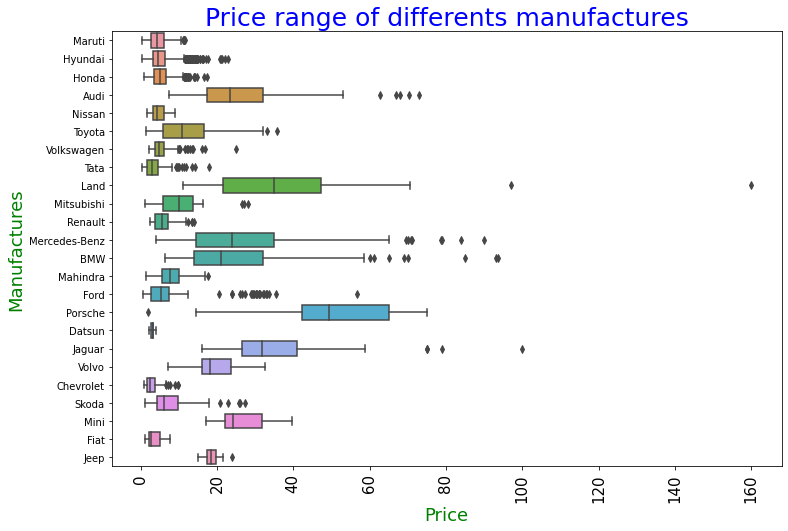

In [195]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1,y="Name",x="Price")
plt.xlabel("Price",size=18,c="g")
plt.ylabel("Manufactures",size=18,c="g")
plt.title("Price range of differents manufactures",size=25,c="blue")
plt.xticks(rotation='vertical',size=15)
plt.show()

<b>conclusion:<b>
*  Here clearly we can see that price of cars more depends on its brand
*  range of price is different for differents brand

<font size='4'>Fuel Type</font>

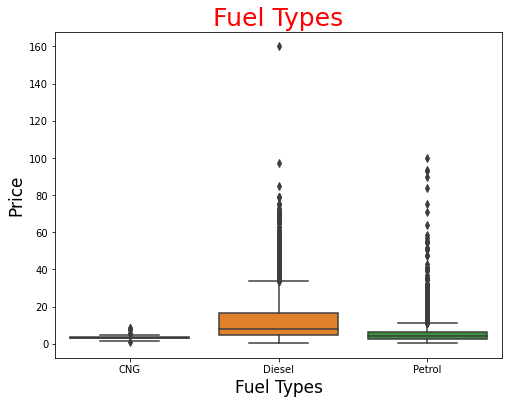

In [196]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1,x="Fuel_Type",y="Price")
plt.xlabel("Fuel Types",size=17,c="k")
plt.ylabel("Price",size=17,c="k")
plt.title("Fuel Types",size=25,c="red")
plt.show()

<b>conclusion:<b>
*  See Price for different fuel types
*  Price of diesel cars are more than petrol

<font size='4'>Year Vs Price</font>

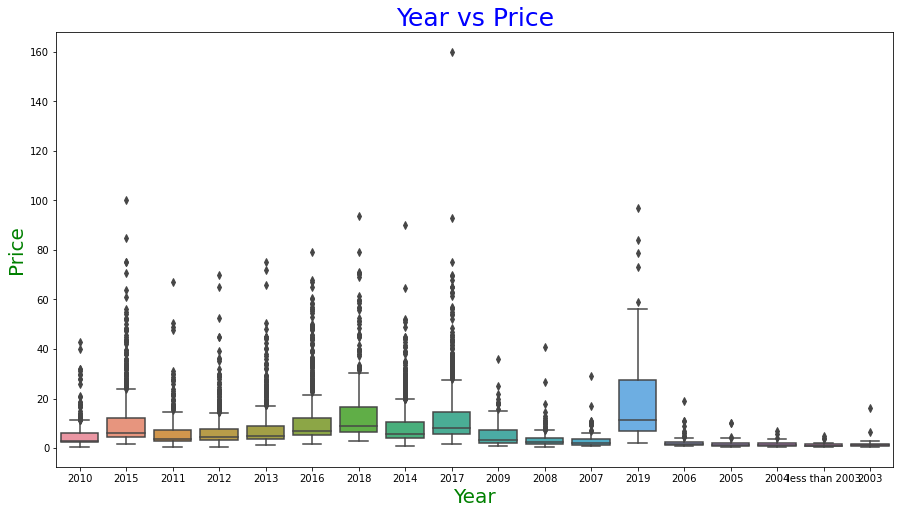

In [197]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df1,x="Year",y="Price")
plt.xlabel("Year",size=20,c="g")
plt.ylabel("Price",size=20,c="g")
plt.title("Year vs Price",size=25,c="blue")
plt.show()

<b>conclusion:<b>
*  so clearly seen that as car become older its price get reduces
*  Year of car is imp to predict output

<font size='4'>Frequency of Seats</font>

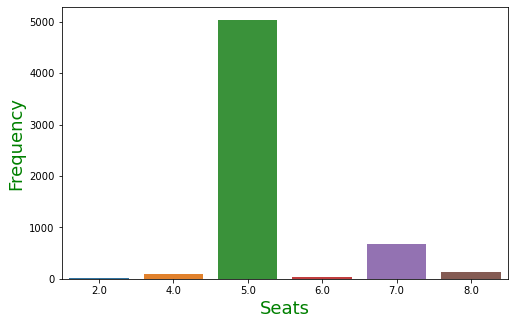

In [198]:
plt.figure(figsize=(8,5))
sns.countplot(data=df1,x="Seats")
plt.xlabel("Seats",size=18,c="g")
plt.ylabel("Frequency",size=18,c="g")
plt.show()

<b>conclusion:<b>
*  Frequency of 5 seaters cas is very very high as compared to other
*  But its not so imp to predict output

<font size='4'>Total % of owner</font>

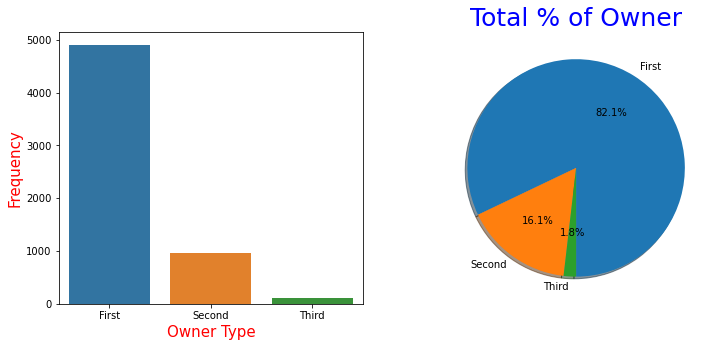

In [199]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=df1,x="Owner_Type")
plt.xlabel("Owner Type",size=15,c="r")
plt.ylabel("Frequency",size=15,c="r")
plt.subplot(1,2,2)
labels =df1['Owner_Type'].value_counts(sort = True).index
sizes = df1['Owner_Type'].value_counts(sort = True)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Total % of Owner',size = 25,c="blue")
plt.show()

<b>conclusion:<b>
*  percentages of 1st Owners is very high ie 82 %

<font size='4'>Get statistical info of Num features</font>

In [200]:
df1.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5.974000e+03,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000
mean,5.865187e+04,18.166691,1619.134961,112.648435,5.272682,9.473658
std,9.148420e+04,4.548538,594.935278,53.187367,0.782232,11.090805
min,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,3.400000e+04,15.260000,1198.000000,75.000000,5.000000,3.500000
50%,5.300000e+04,18.160000,1493.000000,93.700000,5.000000,5.650000
75%,7.300000e+04,21.100000,1982.500000,138.100000,5.000000,9.957500
max,6.500000e+06,33.540000,5461.000000,550.000000,8.000000,160.000000


<font size='4'>Handling Outliers</font>

0 Kilometers_Driven
1 Power
2 Mileage
3 Engine


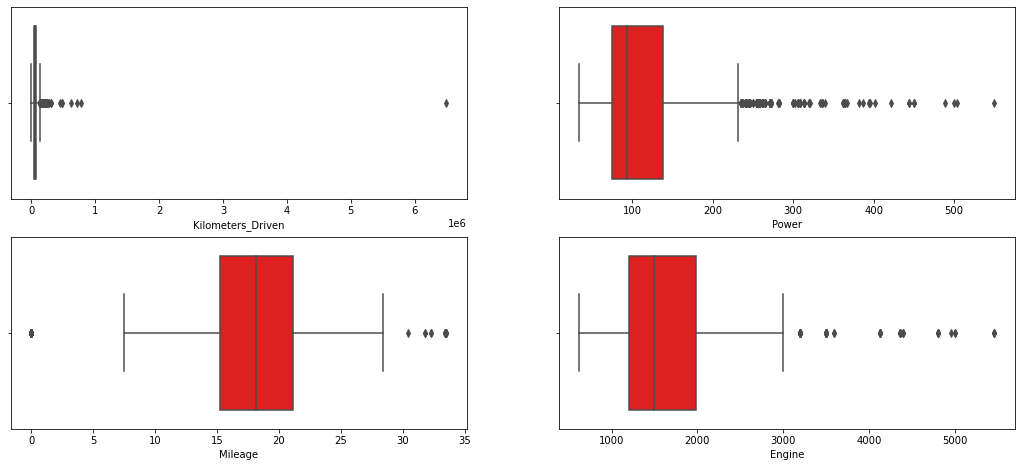

In [201]:
col = ['Kilometers_Driven','Power','Mileage','Engine'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(x=v, data=df1,color='red')
plt.show()

<font size='4'>Outlier Removal</font>

In [202]:
df1.drop(df1[df1['Kilometers_Driven']>300000].index,inplace=True,axis=0)

In [203]:
df1.drop(df1[df1['Power']>480].index,inplace=True,axis=0)

<font size='4'>Visualize after removing Major outliers</font>

0 Kilometers_Driven
1 Power
2 Mileage
3 Engine


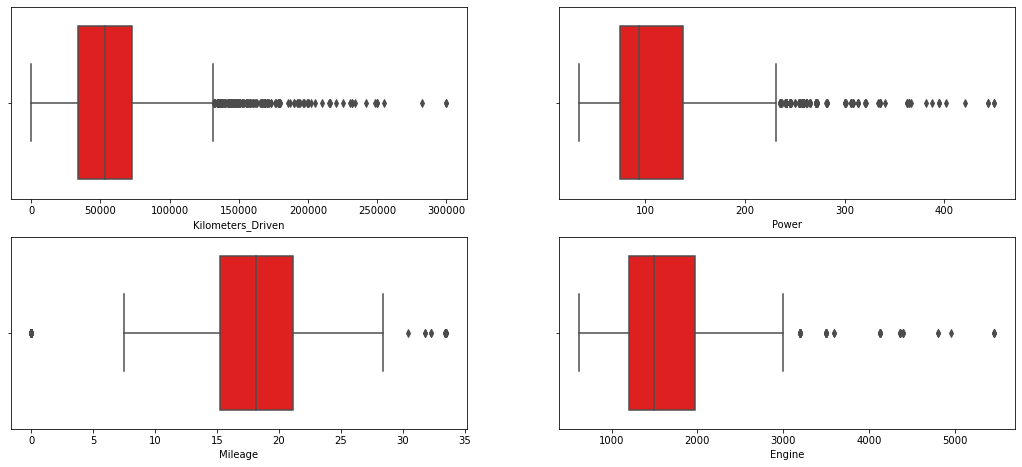

In [204]:
col = ['Kilometers_Driven','Power','Mileage','Engine'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(x=v, data=df1,color='red')
plt.show()

In [205]:
df1.shape

(5963, 13)

<font size='4'>Data distribution of output Price feature</font>

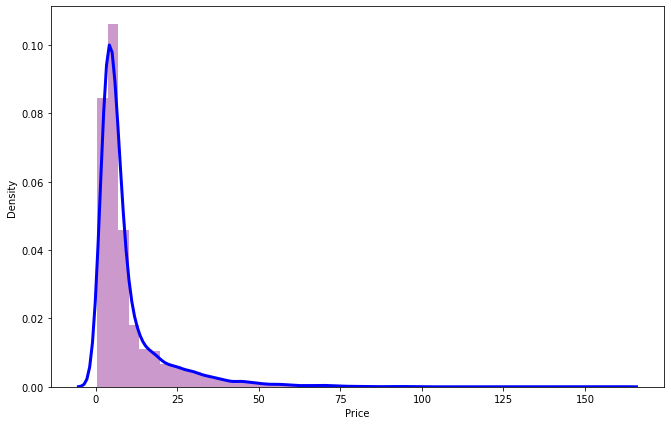

In [206]:
plt.figure(figsize=(11,7))
plt.subplot(1,1,1)
sns.distplot(df1['Price'],color='purple',kde_kws={'linewidth':3,'color':'b'});
plt.show()

0 Kilometers_Driven
1 Mileage
2 Engine
3 Price


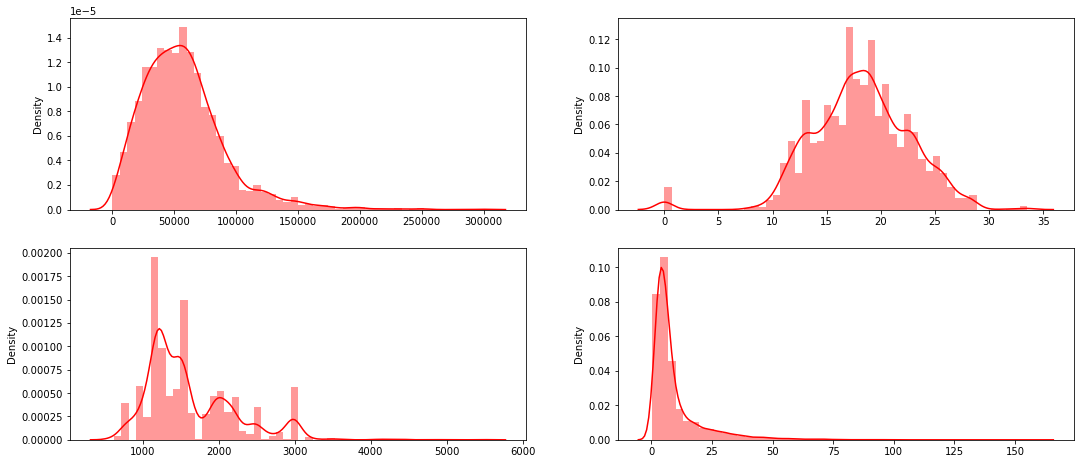

In [207]:
col = ['Kilometers_Driven','Mileage','Engine',"Price"] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.distplot(x=df1[v],color='r')
plt.show()

<font size='4'>Effect of Fuel type Price</font>

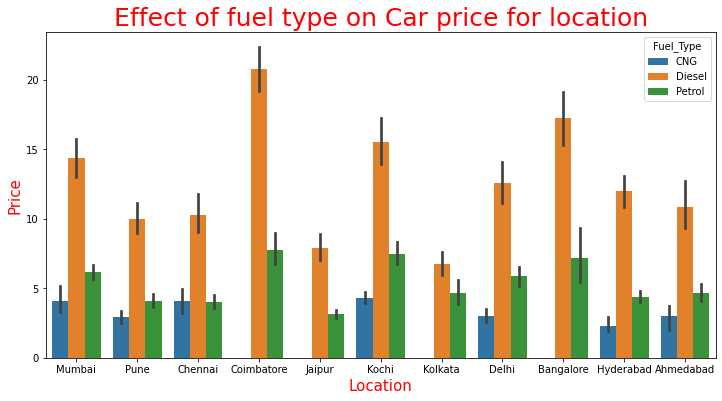

In [208]:
plt.figure(figsize=(12,6))
sns.barplot(data=df1,y="Price",x='Location',hue='Fuel_Type')
plt.xlabel("Location",size=15,c="r")
plt.ylabel("Price",size=15,c="r")
plt.title("Effect of fuel type on Car price for location",size=25,c="red")
plt.show()

<b>conclusion:<b>
*  Here clearly we can see that price of Diesel car is more than than petrol irespective of location

<font size='4'>Effect of fuel type on price of differents brands</font>

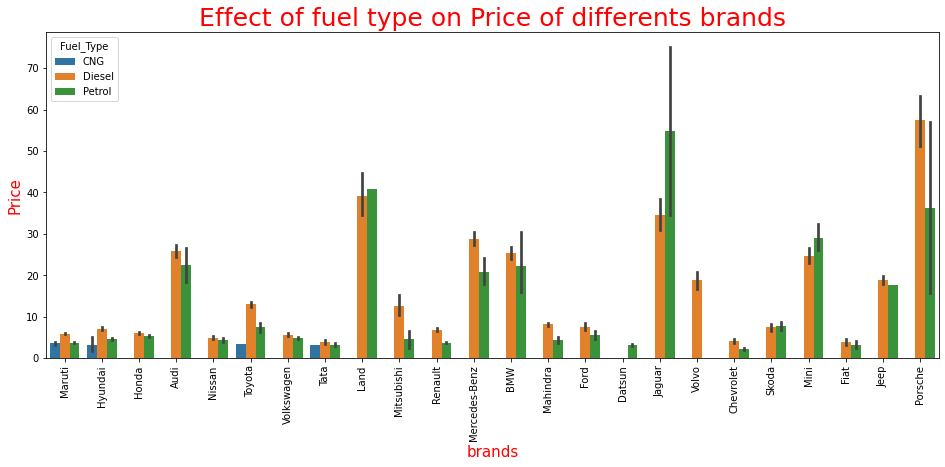

In [209]:
plt.figure(figsize=(16,6))
sns.barplot(data=df1,y="Price",x='Name',hue='Fuel_Type',ci=90)
plt.xlabel("brands",size=15,c="r")
plt.ylabel("Price",size=15,c="r")
plt.xticks(rotation="vertical",size=10)
plt.title("Effect of fuel type on Price of differents brands",size=25,c="red")
plt.show()

<b>conclusion:<b>
*  Here clearly we can see that price of Diesel car for some brands such as jaguar and Land is less than petrol

<font size='4'>Scatter Plot</font>


<b>Scatter Plot to get idea of correlation of some num features with o/p<b>

0 Kilometers_Driven
1 Mileage
2 Engine
3 Power


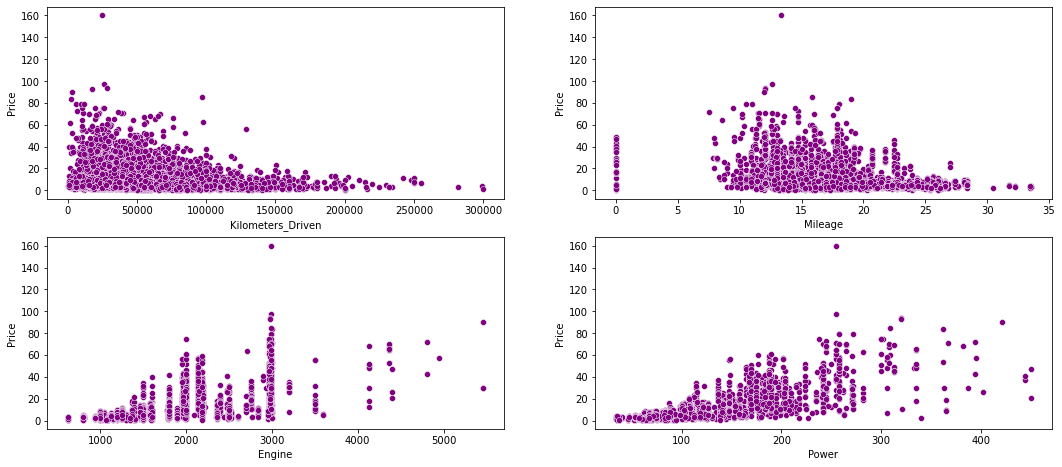

In [210]:
col = ['Kilometers_Driven','Mileage','Engine',"Power"] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=df1[v],y=df1['Price'],color='purple')
plt.show()

<font size='4'>Owner relation with Price</font>

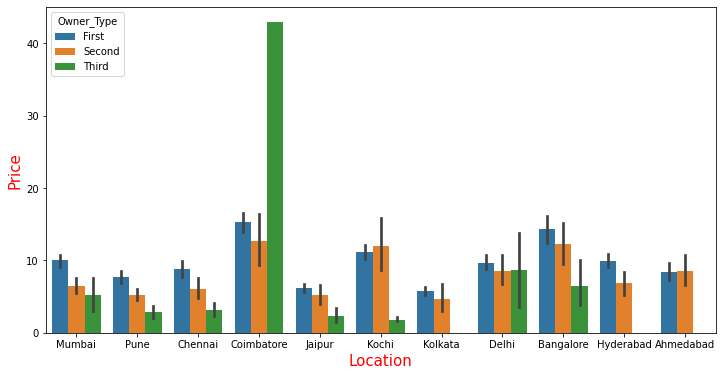

In [211]:
plt.figure(figsize=(12,6))
sns.barplot(data=df1,y="Price",x='Location',hue='Owner_Type')
plt.xlabel("Location",size=15,c="red")
plt.ylabel("Price",size=15,c="red")
plt.show()

<font size='4'>Transmission System relation with Price</font>

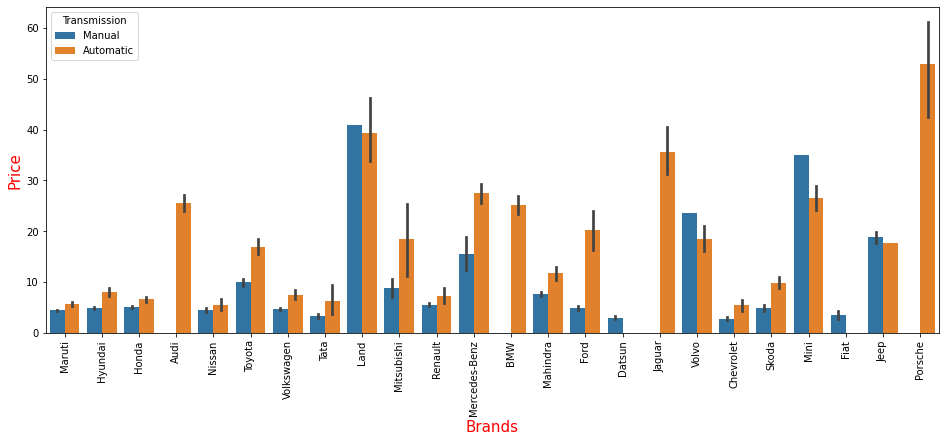

In [212]:
plt.figure(figsize=(16,6))
sns.barplot(data=df1,y="Price",x='Name',hue='Transmission')
plt.xlabel("Brands",size=15,c="red")
plt.ylabel("Price",size=15,c="red")
plt.xticks(rotation="vertical",size=10)
plt.show()

<b>conclusion:<b>
*  Car with Automatic Transmission system has more price than manual that is OK
*  But In real life practise price of car is not highly depends on Transmission system

<font size='4'>Heatmap</font>

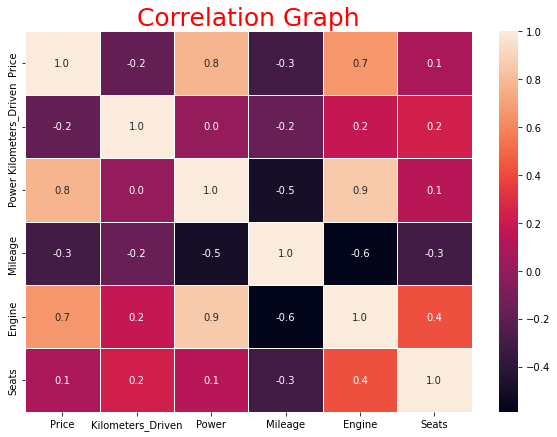

In [213]:
plt.figure(figsize=(10,7))
sns.heatmap(df1[["Price","Kilometers_Driven","Power","Mileage","Engine","Seats"]].corr(), annot=True,linewidths=.5,fmt='.1f')
plt.title("Correlation Graph",c="r",size=25)
plt.show()

<b>conclusion:<b>
*  Here we can see that Engine Power has strong positive realtion with price
*  But we can also realise that Engine and Power itself has strong relation So In order to avoid multicolinearity problem we will drop one which has less correlation with output
*  Power has good relation with price as compared to Engine so we drop Engine
*  Clearly we can say that more Engine CC more Power more the price of car but one power feature is sufficent to get all info

<font size='4'>Drop Features with very less correlation with o/p price</font>

In [214]:
df1.drop(['Mileage','Seats','Engine','Transmission'],axis=1,inplace=True)
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Power,Price,Model
0,Maruti,Mumbai,2010,72000,CNG,First,58.16,1.75,Wagon
1,Hyundai,Pune,2015,41000,Diesel,First,126.20,12.50,Creta
2,Honda,Chennai,2011,46000,Petrol,First,88.70,4.50,Jazz
3,Maruti,Chennai,2012,87000,Diesel,First,88.76,6.00,Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Second,140.80,17.74,A4
...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,First,74.00,4.75,Swift
6015,Hyundai,Jaipur,2015,100000,Diesel,First,71.00,4.00,Xcent
6016,Mahindra,Jaipur,2012,55000,Diesel,Second,112.00,2.90,Xylo
6017,Maruti,Kolkata,2013,46000,Petrol,First,67.10,2.65,Wagon


# <font color='blue'> Feature Engineering: </font>

# <font color='red'>Features Construction</font>

<b>We create single feature by combining Company Name and Its model<b>
*  so we will have completely new feature of name Car which store info of Car and its model
*  Price of car is base not only on its company, its model also matter
*  If you are buying BMW 2 series and 7 series, company is same but in price there is lots of difference

In [215]:
df1['Car'] = df1['Name'].astype(str) + " " + df1['Model']

In [216]:
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Power,Price,Model,Car
0,Maruti,Mumbai,2010,72000,CNG,First,58.16,1.75,Wagon,Maruti Wagon
1,Hyundai,Pune,2015,41000,Diesel,First,126.20,12.50,Creta,Hyundai Creta
2,Honda,Chennai,2011,46000,Petrol,First,88.70,4.50,Jazz,Honda Jazz
3,Maruti,Chennai,2012,87000,Diesel,First,88.76,6.00,Ertiga,Maruti Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Second,140.80,17.74,A4,Audi A4
...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,First,74.00,4.75,Swift,Maruti Swift
6015,Hyundai,Jaipur,2015,100000,Diesel,First,71.00,4.00,Xcent,Hyundai Xcent
6016,Mahindra,Jaipur,2012,55000,Diesel,Second,112.00,2.90,Xylo,Mahindra Xylo
6017,Maruti,Kolkata,2013,46000,Petrol,First,67.10,2.65,Wagon,Maruti Wagon


<font size='4'>Drop unwanted columns</font>

In [217]:
df1.drop(['Name','Model'],axis=1,inplace=True)
df1

,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Power,Price,Car
0,Mumbai,2010,72000,CNG,First,58.16,1.75,Maruti Wagon
1,Pune,2015,41000,Diesel,First,126.20,12.50,Hyundai Creta
2,Chennai,2011,46000,Petrol,First,88.70,4.50,Honda Jazz
3,Chennai,2012,87000,Diesel,First,88.76,6.00,Maruti Ertiga
4,Coimbatore,2013,40670,Diesel,Second,140.80,17.74,Audi A4
...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,First,74.00,4.75,Maruti Swift
6015,Jaipur,2015,100000,Diesel,First,71.00,4.00,Hyundai Xcent
6016,Jaipur,2012,55000,Diesel,Second,112.00,2.90,Mahindra Xylo
6017,Kolkata,2013,46000,Petrol,First,67.10,2.65,Maruti Wagon


In [218]:
df1 = df1[['Car','Location','Year','Kilometers_Driven','Owner_Type','Fuel_Type','Power','Price']]
df1

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power,Price
0,Maruti Wagon,Mumbai,2010,72000,First,CNG,58.16,1.75
1,Hyundai Creta,Pune,2015,41000,First,Diesel,126.20,12.50
2,Honda Jazz,Chennai,2011,46000,First,Petrol,88.70,4.50
3,Maruti Ertiga,Chennai,2012,87000,First,Diesel,88.76,6.00
4,Audi A4,Coimbatore,2013,40670,Second,Diesel,140.80,17.74
...,...,...,...,...,...,...,...,...
6014,Maruti Swift,Delhi,2014,27365,First,Diesel,74.00,4.75
6015,Hyundai Xcent,Jaipur,2015,100000,First,Diesel,71.00,4.00
6016,Mahindra Xylo,Jaipur,2012,55000,Second,Diesel,112.00,2.90
6017,Maruti Wagon,Kolkata,2013,46000,First,Petrol,67.10,2.65


In [219]:
df1['Car'].unique

<bound method Series.unique of 0         Maruti Wagon
1        Hyundai Creta
2           Honda Jazz
3        Maruti Ertiga
4              Audi A4
             ...      
6014      Maruti Swift
6015     Hyundai Xcent
6016     Mahindra Xylo
6017      Maruti Wagon
6018    Chevrolet Beat
Name: Car, Length: 5963, dtype: object>

<font size='4'>Total no. of categories of cars</font>

In [220]:
len(df1['Car'].value_counts())

200

<b>see total no of categories of cars with their models<b>

In [221]:
lst = df1['Car'].unique()
no_models= []
for i in lst:
    df3=df1[df1['Car']==i]
    no_models.append(len(df3))

In [222]:
dic = dict(zip(list(lst),no_models))

In [223]:
sort_orders = sorted(dic.items(), key=lambda x: x[1])
for i in sort_orders:
    print(i[0], i[1])

Mini Countryman 1
Mini Clubman 1
Porsche Boxster 1
Mahindra XUV300 1
Volkswagen Beetle 1
Volkswagen Tiguan 1
Nissan Evalia 1
Mitsubishi Montero 1
Tata Venture 1
Toyota Platinum 1
Mercedes-Benz CLS-Class 1
Ford Classic 1
Datsun Redi 1
Ford Mustang 1
Ford Fusion 1
Mercedes-Benz SL-Class 1
Maruti Versa 1
Honda WR-V 1
Mercedes-Benz SLC 2
Audi RS5 2
Renault Lodgy 2
Audi A8 2
Nissan Teana 2
Volvo S80 2
Mitsubishi Cedia 2
Mercedes-Benz GLS 2
Mahindra Renault 2
Mitsubishi Outlander 2
Chevrolet Captiva 2
Fiat Punto 2
Mahindra Logan 2
Chevrolet Tavera 2
Volvo XC90 2
Mitsubishi Lancer 2
BMW Z4 2
Nissan X-Trail 3
Mercedes-Benz C-Class 3
BMW 1 3
Mahindra NuvoSport 3
Jaguar XE 3
Tata Xenon 3
Honda BR-V 3
Renault Captur 3
Maruti S-Cross 3
Audi TT 3
Mercedes-Benz SLK-Class 3
Renault Koleos 3
Toyota Qualis 3
Audi A7 3
Ford Freestyle 3
Maruti Grand 3
Tata Nexon 3
Honda WRV 4
Volvo V40 4
Mahindra Verito 4
Hyundai Tucson 4
Audi A3 4
Tata Hexa 4
Fiat Avventura 4
Ford Aspire 4
Tata Bolt 4
Volkswagen CrossPo

In [224]:
sortedDict = dict( sorted(dic.items(), key=lambda x: x[0].lower()) )
for k,v in sortedDict.items():
    print('{}:{}'.format(k,v))

Audi A3:4
Audi A4:77
Audi A6:49
Audi A7:3
Audi A8:2
Audi Q3:27
Audi Q5:30
Audi Q7:38
Audi RS5:2
Audi TT:3
BMW 1:3
BMW 3:98
BMW 5:68
BMW 6:7
BMW 7:13
BMW X1:32
BMW X3:14
BMW X5:23
BMW X6:6
BMW Z4:2
Chevrolet Aveo:14
Chevrolet Beat:46
Chevrolet Captiva:2
Chevrolet Cruze:18
Chevrolet Enjoy:9
Chevrolet Optra:12
Chevrolet Sail:8
Chevrolet Spark:10
Chevrolet Tavera:2
Datsun GO:6
Datsun Redi:1
Datsun redi-GO:6
Fiat Avventura:4
Fiat Grande:5
Fiat Linea:12
Fiat Punto:2
Ford Aspire:4
Ford Classic:1
Ford Ecosport:53
Ford EcoSport:42
Ford Endeavour:38
Ford Fiesta:40
Ford Figo:101
Ford Freestyle:3
Ford Fusion:1
Ford Ikon:14
Ford Mustang:1
Honda Accord:26
Honda Amaze:106
Honda BR-V:3
Honda Brio:60
Honda BRV:5
Honda City:269
Honda Civic:32
Honda CR-V:27
Honda Jazz:58
Honda Mobilio:16
Honda WR-V:1
Honda WRV:4
Hyundai Accent:18
Hyundai Creta:93
Hyundai Elantra:22
Hyundai Elite:14
Hyundai EON:60
Hyundai Getz:10
Hyundai Grand:152
Hyundai i10:154
Hyundai i20:245
Hyundai Santa:17
Hyundai Santro:75
Hyundai 

# <font color='red'>Feature Selection</font>

*  As seee there are 200 cars categories
*  so we will drop all categories with very less frequency or counts
*  These will really helpful as its reduce computation time and improve machine effectiveness

In [225]:
len(df1['Car'].value_counts()[df1['Car'].value_counts()<10])

95

In [226]:
df1['Car'].value_counts()[df1['Car'].value_counts()<10]

Tata Safari          9
Mahindra TUV         9
Chevrolet Enjoy      9
Chevrolet Sail       8
Volkswagen Passat    8
                    ..
Nissan Evalia        1
Mini Countryman      1
Volkswagen Tiguan    1
Volkswagen Beetle    1
Honda WR-V           1
Name: Car, Length: 95, dtype: int64

<font size='4'>Lets drop categ with frequecy less than 10</font>

In [227]:
l = df1['Car'].value_counts()[df1['Car'].value_counts()<10].index
df1[df1['Car'].isin(l)]

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power,Price
21,Maruti S,Bangalore,2015,55392,Second,Diesel,88.50,8.25
28,Honda WRV,Kochi,2018,37430,First,Petrol,88.70,9.90
49,Mahindra Thar,Jaipur,2012,75800,Second,Diesel,105.00,5.50
58,Nissan X-Trail,Hyderabad,2010,121812,First,Diesel,147.60,7.75
67,Mercedes-Benz C-Class,Coimbatore,2019,15369,First,Diesel,194.00,35.67
...,...,...,...,...,...,...,...,...
5928,Mahindra NuvoSport,Coimbatore,2018,37323,Second,Diesel,100.00,7.29
5982,Tata Hexa,Jaipur,2016,39000,First,Diesel,153.86,13.50
5990,Tata New,Pune,2008,86000,Third,Diesel,138.00,0.60
5999,Tata Bolt,Chennai,2016,10000,First,Petrol,88.70,4.00


In [228]:
df1.drop(df1[df1['Car'].isin(l)].index,inplace=True,axis=0)

In [229]:
df1_new = df1.copy()

<font size='4'>Shape of Data after EDA</font>

In [230]:
df1.shape

(5613, 8)

In [231]:
df1.dtypes

Car                   object
Location              object
Year                  object
Kilometers_Driven      int64
Owner_Type            object
Fuel_Type             object
Power                float64
Price                float64
dtype: object

In [232]:
df1[['Car','Location','Year','Owner_Type','Fuel_Type']].nunique()

Car           105
Location       11
Year           18
Owner_Type      3
Fuel_Type       3
dtype: int64

<b>conclusion:<b>
*  We have consider All important features base on above visualisation and domain knowledge

# <font color='red'>Encoding of Categorical features</font>

In [233]:
from sklearn.preprocessing import LabelEncoder

<font size='4'>Label Encoding on 'Car', 'Location' and 'Fuel_Type' columns</font>

In [234]:
le = LabelEncoder()

In [235]:
lst = ['Car','Location','Fuel_Type']
for i in lst:
    le = LabelEncoder()
    df1[i]=le.fit_transform(df1[i])

In [236]:
df1

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power,Price
0,67,9,2010,72000,First,0,58.16,1.75
1,32,10,2015,41000,First,1,126.20,12.50
2,29,2,2011,46000,First,2,88.70,4.50
3,61,2,2012,87000,First,1,88.76,6.00
4,0,3,2013,40670,Second,1,140.80,17.74
...,...,...,...,...,...,...,...,...
6014,65,4,2014,27365,First,1,74.00,4.75
6015,41,6,2015,100000,First,1,71.00,4.00
6016,52,6,2012,55000,Second,1,112.00,2.90
6017,67,8,2013,46000,First,2,67.10,2.65


<font size='4'>Ordinal Encoding on 'Owner_Type' and 'Year'</font>

In [237]:
df1['Owner_Type'].value_counts()

First     4612
Second     900
Third      101
Name: Owner_Type, dtype: int64

In [238]:
dic = {'First':2,'Second':1,'Third':0}

In [239]:
df1['Year'].value_counts()

2014              754
2015              704
2016              700
2013              607
2012              556
2017              535
2011              434
2010              316
2018              268
2009              187
2008              161
2007              113
2019               87
2006               74
2005               53
2004               27
less than 2003     26
2003               11
Name: Year, dtype: int64

In [240]:
dic1 = {'2019':18,"2018":17,"2017":16,"2016":15,"2015":14,"2014":13,"2013":12,"2012":11,"2011":10,"2010":9,"2009":8,"2008":7,"2007":6,"2006":5,"2005":4,"2004":3,"2003":2,"less than 2003":1 }

In [241]:
df1['Owner_Type']=df1['Owner_Type'].map(dic)
df1['Year']=df1['Year'].map(dic1)

In [242]:
df1

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power,Price
0,67,9,9,72000,2,0,58.16,1.75
1,32,10,14,41000,2,1,126.20,12.50
2,29,2,10,46000,2,2,88.70,4.50
3,61,2,11,87000,2,1,88.76,6.00
4,0,3,12,40670,1,1,140.80,17.74
...,...,...,...,...,...,...,...,...
6014,65,4,13,27365,2,1,74.00,4.75
6015,41,6,14,100000,2,1,71.00,4.00
6016,52,6,11,55000,1,1,112.00,2.90
6017,67,8,12,46000,2,2,67.10,2.65


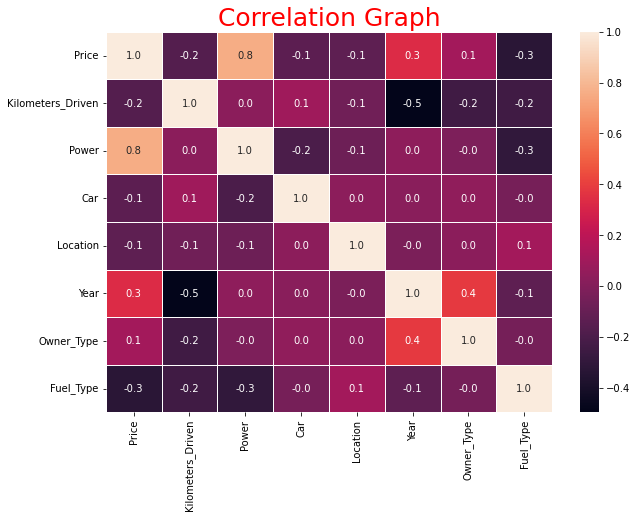

In [243]:
plt.figure(figsize=(10,7))
sns.heatmap(df1[["Price","Kilometers_Driven","Power","Car","Location","Year","Owner_Type","Fuel_Type"]].corr(), annot=True,linewidths=.5,fmt='.1f')
plt.title("Correlation Graph",c="r",size=25)
plt.show()

# <font color='red'>Model Training and Model Evaluation</font>

<font size='4'>Model Training</font>

<font size='3'>Inputs and Output selection (X and Y)</font>

In [244]:
X = df1.drop("Price",axis=1)   #X --- > Independent variables
Y= df1['Price']                #Y --- > Dependent variables

In [245]:
Y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5613, dtype: float64

<font size='4'>Train-Test split (70/30 ratio)</font>

In [246]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [247]:
X_train

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power
3626,21,3,14,92885,2,1,68.00
3946,65,5,15,30000,2,1,74.00
3421,97,0,13,59000,2,2,138.03
4846,0,5,12,52000,2,1,147.51
5420,5,9,15,19000,1,1,190.00
...,...,...,...,...,...,...,...
979,67,10,13,51000,2,2,67.04
5570,83,2,11,80000,2,1,108.45
4280,84,10,14,28000,2,2,53.30
256,100,10,16,43000,2,1,147.80


<font size='4'> Multiple Linear Regression</font>

In [248]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

In [249]:
mod=lr.fit(X_train, Y_train)
y_pred= lr.predict(X_test)
print("Accuracy on Traing set: ",lr.score(X_train,Y_train))
print("Accuracy on Testing set: ",lr.score(X_test,Y_test))

Accuracy on Traing set:  0.6779073313110087
Accuracy on Testing set:  0.6861011272608692


<b> Conclusion: <b>
* Model accuracy is less 

In [250]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('Adjusted R Squared       : ', metrics.r2_score(Y_test, y_pred))

		Error Table
Mean Absolute Error      :  3.5924322822209818
Mean Squared  Error      :  35.25017237742846
Root Mean Squared  Error :  5.937185560299464
Adjusted R Squared       :  0.6861011272608692


<b> Conclusion <b>
*  Adjusted R^2 value is not good enough
*  To improve our model we will use Transformation

In [251]:
Y.skew()

3.3020425968711473

* Price Variable is highly skewed 
* To normalize it we will use log transformation on Price variable to fullfill the basic assumptions of linear model

## Log Transformation

In [252]:
Y1=np.log10(Y)

In [253]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y1,test_size=0.3,random_state=1)

In [254]:
lr.fit(X_train, Y_train)
y_pred= lr.predict(X_test)

<font size = '4'>CHECKING ACCURACY OF THE TRAINING MODEL</font>

In [255]:
print("Accuracy on Traing set: ",lr.score(X_train,Y_train))
print("Accuracy on Testing set: ",lr.score(X_test,Y_test))

Accuracy on Traing set:  0.863774384868148
Accuracy on Testing set:  0.8729504376688504


* Accuracy increased after transformation

In [256]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('Adjusted R Squared                : ', metrics.r2_score(Y_test, y_pred))

		Error Table
Mean Absolute Error      :  0.09773452322835827
Mean Squared  Error      :  0.017043932307162626
Root Mean Squared  Error :  0.1305524121077915
R Squared                :  0.8729504376688504


* Adjusted R^2 value improved to 0.87

<font size='4'>Checking for the assumptions</font>

In [257]:
residual = Y_test-y_pred
print(residual.skew())
print(residual.kurt())

0.055783300407082584
1.5571214393126542


<b> Conclusion: <b>

*  Skewness is approximately tending to 0
*  Kurtosis is approximately tending to 3

<AxesSubplot:ylabel='Density'>

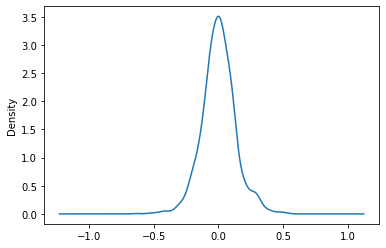

In [258]:
residual.plot(kind = 'kde')

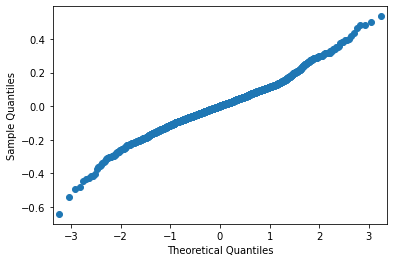

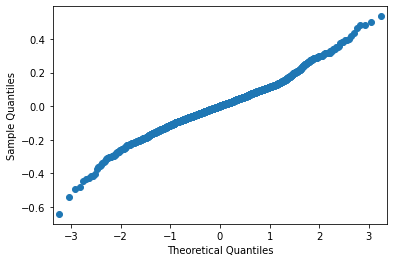

In [259]:
sm.qqplot(residual)

<b> Conclusion : <b>
*  Error is normaly distributed with a constant variance  

<font size='4'>Scatter Plot --> pred vs Residual error</font>

In [260]:
#Create a Dictionary:
dic={'Y_pred' :y_pred,'residual' : residual}
df2=pd.DataFrame(dic)
df2.head()

,Y_pred,residual
3665,0.577811,-0.045057
2604,1.295927,0.248141
1551,0.414447,-0.043379
2313,0.697185,-0.185301
2375,0.238186,0.073568


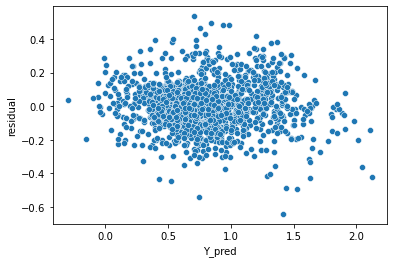

In [261]:
sns.scatterplot(data=df2,x='Y_pred',y='residual')
plt.show()

<b> Conclusion <b>
*  We don't find any funnel type pattren, therefore the data is in homoscedacity(Approximately)(no heteroscadacity)

<AxesSubplot:>

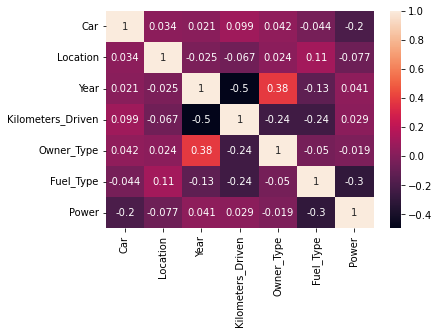

In [262]:
sns.heatmap(X.corr(),annot = True)

<b> conclusion: <b>
*  No multicolinearity in predictor variables

# <font color='red'>Cross Validation Score</font>

In [263]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score

In [264]:
mean_score = cross_val_score(lr, X, Y1, cv=5)

In [265]:
mean_score.mean()

0.8658685834036237

# <font color='red'> Conclusion </font>

1. From heatmap,as seen above Power is very much Important factor which dominates more to determine selling price of car

2. 2nd imporatnt factor is Model year as car become old and old its value and price goes down

3. Price of Diesel car is slight higher than petrol car

4. Price of car is base not only on its company, its model also matter

5. After prediction using Multiple linear Regression concluded with  adjusted R^2 value 0.686

6. Since adjusted R^2 value 0.682 is not good enough, to improve model used log transformation and got adjusted R^2 value 0.873.

7. The obtained model is perfect one as it explains most of the variations and obeying all assumtions for carrying out the multiple linear regression
